# Case Study: Grain Yield Analysis
This is a practice case study from DataCamp's course in "Data Scientist with R". This case study works with grain yield data from the [United States Department of Agriculture, National Agricultural Statistics Service](https://quickstats.nass.usda.gov/).

__Outline:__
1. A glimpse at the data & some necessary information
2. Functions for preparing data (convert units)
3. Functions for plotting data
4. Model grain yield

## 1. A glimpse at the data & some necessary information

In [15]:
# Load library
library(tidyverse)
library(dplyr)
library(magrittr)
library(ggplot2)
library(mgcv)

# Load data
corn <- readRDS("nass.corn.rds")
wheat <- readRDS("nass.wheat.rds")
barley <- readRDS("nass.barley.rds")

# A glimpse at the data
glimpse(corn)
glimpse(wheat)
glimpse(barley)

Observations: 6,381
Variables: 4
$ year                   <int> 1866, 1866, 1866, 1866, 1866, 1866, 1866, 18...
$ state                  <chr> "Alabama", "Arkansas", "California", "Connec...
$ farmed_area_acres      <dbl> 1050000, 280000, 42000, 57000, 200000, 12500...
$ yield_bushels_per_acre <dbl> 9.0, 18.0, 28.0, 34.0, 23.0, 9.0, 6.0, 29.0,...
Observations: 5,963
Variables: 4
$ year                   <int> 1866, 1866, 1866, 1866, 1866, 1866, 1866, 18...
$ state                  <chr> "Alabama", "Arkansas", "California", "Connec...
$ farmed_area_acres      <dbl> 125000, 50000, 650000, 2000, 59000, 245000, ...
$ yield_bushels_per_acre <dbl> 5.0, 6.5, 18.0, 17.5, 11.0, 4.0, 10.5, 10.0,...
Observations: 4,839
Variables: 4
$ year                   <int> 1866, 1866, 1866, 1866, 1866, 1866, 1866, 18...
$ state                  <chr> "Connecticut", "Illinois", "Indiana", "Iowa"...
$ farmed_area_acres      <dbl> 1000, 96000, 11000, 66000, 2000, 10000, 3400...
$ yield_bushels_per_acre <dbl> 2

In [16]:
# The first 5 rows of each datasets
head(corn, 5)
head(wheat, 5)
head(barley, 5)

year,state,farmed_area_acres,yield_bushels_per_acre
1866,Alabama,1050000,9
1866,Arkansas,280000,18
1866,California,42000,28
1866,Connecticut,57000,34
1866,Delaware,200000,23


year,state,farmed_area_acres,yield_bushels_per_acre
1866,Alabama,125000,5.0
1866,Arkansas,50000,6.5
1866,California,650000,18.0
1866,Connecticut,2000,17.5
1866,Delaware,59000,11.0


year,state,farmed_area_acres,yield_bushels_per_acre
1866,Connecticut,1000,22.5
1866,Illinois,96000,23.4
1866,Indiana,11000,23.0
1866,Iowa,66000,22.0
1866,Kansas,2000,23.0


In [17]:
# Statistical summary of data
summary(corn)
summary(wheat)
summary(barley)

      year         state           farmed_area_acres  yield_bushels_per_acre
 Min.   :1866   Length:6381        Min.   :    1000   Min.   :  3.00        
 1st Qu.:1904   Class :character   1st Qu.:   60000   1st Qu.: 23.00        
 Median :1937   Mode  :character   Median :  630000   Median : 36.00        
 Mean   :1938                      Mean   : 1695682   Mean   : 52.41        
 3rd Qu.:1973                      3rd Qu.: 2360000   3rd Qu.: 73.00        
 Max.   :2011                      Max.   :13900000   Max.   :225.00        

      year         state           farmed_area_acres  yield_bushels_per_acre
 Min.   :1866   Length:5963        Min.   :    1000   Min.   :  2.00        
 1st Qu.:1904   Class :character   1st Qu.:  119000   1st Qu.: 14.00        
 Median :1940   Mode  :character   Median :  445000   Median : 20.00        
 Mean   :1940                      Mean   : 1246779   Mean   : 25.45        
 3rd Qu.:1976                      3rd Qu.: 1550000   3rd Qu.: 33.00        
 Max.   :2011                      Max.   :14855000   Max.   :112.20        
                                   NA's   :1                                

      year         state           farmed_area_acres yield_bushels_per_acre
 Min.   :1866   Length:4839        Min.   :   1000   Min.   :  4.50        
 1st Qu.:1906   Class :character   1st Qu.:  12000   1st Qu.: 22.85        
 Median :1940   Mode  :character   Median :  45000   Median : 28.50        
 Mean   :1939                      Mean   : 222343   Mean   : 34.64        
 3rd Qu.:1970                      3rd Qu.: 167500   3rd Qu.: 42.00        
 Max.   :2011                      Max.   :3918000   Max.   :135.00        

At the glance, it's a great dataset, but unfortunately the areas and grain yields are in US units, so we'll have to convert them to metric units. In this situation, the `magrittr` library will be useful.

1. 1 acre = 4840 square yards = area of land 2 oxen can plough in a day
2. 1 hectare = 10000 square meters = 2 football fields = 150 New York apartments
3. 1 yeard = 36 inches
4. 1 inch = 0.0253 meters
5. 1 bushel = 2 baskets of peaches
6. 1 kilogram = 1 squirrel monkey


## 2. Functions for preparing data
### Convert areas to metric

In [18]:
# Write a function to convert acres to sq. yards
acres_to_sq_yards <- function(acres) {
  acres * 4840
}

# Write a function to convert yards to meters
yards_to_meters <- function(yards){
    yards * 0.0254 * 36
}

# Write a function to convert sq. meters to hectares
sq_meters_to_hectares <- function(sq_meters){
    sq_meters / 10000
}

# Write a function to convert sq. yards to sq. meters
sq_yards_to_sq_meters <- function(sq_yards) {
  sq_yards %>%
    # Take the square root
    sqrt() %>%
    # Convert yards to meters
    yards_to_meters() %>%
    # Square it
    raise_to_power(2)
}

# Write a function to convert acres to hectares
acres_to_hectares <- function(acres) {
  acres %>%
    # Convert acres to sq yards
    acres_to_sq_yards() %>%
    # Convert sq yards to sq meters
    sq_yards_to_sq_meters() %>%
    # Convert sq meters to hectares
    sq_meters_to_hectares()
}

# Define a harmonic acres to hectares function
get_reciprocal <- function(x) {
    x = 1/x
}
harmonic_acres_to_hectares <- function(acres) {
  acres %>% 
    # Get the reciprocal
    get_reciprocal() %>%
    # Convert acres to hectares
    acres_to_hectares() %>% 
    # Get the reciprocal again
    get_reciprocal()
}

### Convert yields to metric
The yields in the NASS corn data are also given in US units, namely bushels per acre. We need to write some more utility functions to convert this unit to the metric unit of kg per hectare. As we will calculate area conversions in the denominator of a ratio, harmonic mean will be in use.

Bushels historically meant a volume of 8 gallons, but in the context of grain, they are now defined as masses. This mass differs for each grain! To solve this exercise, you need to know these facts.

1. One pound (lb) = 0.45359237 kilograms (kg).
2. One bushel is 48 lbs of barley, 56 lbs of corn, or 60 lbs of wheat.

In [19]:
# Write a function to convert lb to kg
lbs_to_kgs <- function(lbs){
    lbs * 0.45359237
}

# Write a function to convert bushels to lbs
bushels_to_lbs <- function(bushels, crop) {
  # Define a lookup table of scale factors
  c(barley = 48, corn = 56, wheat = 60) %>%
    # Extract the value for the crop
    extract(crop) %>%
    # Multiply by the no. of bushels
    multiply_by(bushels)
}


# Write a function to convert bushels to kg
bushels_to_kgs <- function(bushels, crop) {
  bushels %>%
    # Convert bushels to lbs for this crop
    bushels_to_lbs(crop) %>%
    # Convert lbs to kgs
    lbs_to_kgs()
}

# Write a function to convert bushels/acre to kg/ha
bushels_per_acre_to_kgs_per_hectare <- function(bushels_per_acre, crop = c("barley", "corn", "wheat")) {
  # Match the crop argument
  crop <- match.arg(crop)
   bushels_per_acre %>%
    # Convert bushels to kgs for this crop
    bushels_to_kgs(crop) %>%
    # Convert harmonic acres to ha
    harmonic_acres_to_hectares()
}

### Applying the unit conversion function
The NASS `corn` dataset is available, and we can **fortify it** (adding new columns) with metrics areas and yields.

This fortification process can also be turned into a function, so you'll define a function for this, and test it on the NASS `wheat` dataset.

In [20]:
# Function to add more columns
fortify_with_metric_units <- function(data, crop) {
  data %>%
    mutate(
      # Convert farmed area from acres to ha
      farmed_area_ha = acres_to_hectares(farmed_area_acres),
      # Convert yield from bushels/acre to kg/ha
      yield_kg_per_ha = bushels_per_acre_to_kgs_per_hectare(
        yield_bushels_per_acre, 
        crop = crop
      )
    )
}

# Try it on the datasets
corn <- fortify_with_metric_units(corn, crop = "corn")
wheat <- fortify_with_metric_units(wheat, crop = "wheat")
barley <- fortify_with_metric_units(barley, crop = "barley")
head(corn, 5)
head(wheat, 5)
head(barley, 5)

year,state,farmed_area_acres,yield_bushels_per_acre,farmed_area_ha,yield_kg_per_ha
1866,Alabama,1050000,9,424919.92,564.909
1866,Arkansas,280000,18,113311.98,1129.818
1866,California,42000,28,16996.80,1757.495
1866,Connecticut,57000,34,23067.08,2134.101
1866,Delaware,200000,23,80937.13,1443.656


year,state,farmed_area_acres,yield_bushels_per_acre,farmed_area_ha,yield_kg_per_ha
1866,Alabama,125000,5.0,50585.7053,336.2553
1866,Arkansas,50000,6.5,20234.2821,437.1320
1866,California,650000,18.0,263045.6675,1210.5192
1866,Connecticut,2000,17.5,809.3713,1176.8937
1866,Delaware,59000,11.0,23876.4529,739.7618


year,state,farmed_area_acres,yield_bushels_per_acre,farmed_area_ha,yield_kg_per_ha
1866,Connecticut,1000,22.5,404.6856,1210.519
1866,Illinois,96000,23.4,38849.8217,1258.940
1866,Indiana,11000,23.0,4451.5421,1237.420
1866,Iowa,66000,22.0,26709.2524,1183.619
1866,Kansas,2000,23.0,809.3713,1237.420


## 3. Function for plotting data
### Plotting yields over time
Now that the units have been dealt with, it's time to explore the datasets. An obvious question to ask about each crop is, "how do the yields change over time in each US state?" Let's draw a line plot to find out!

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


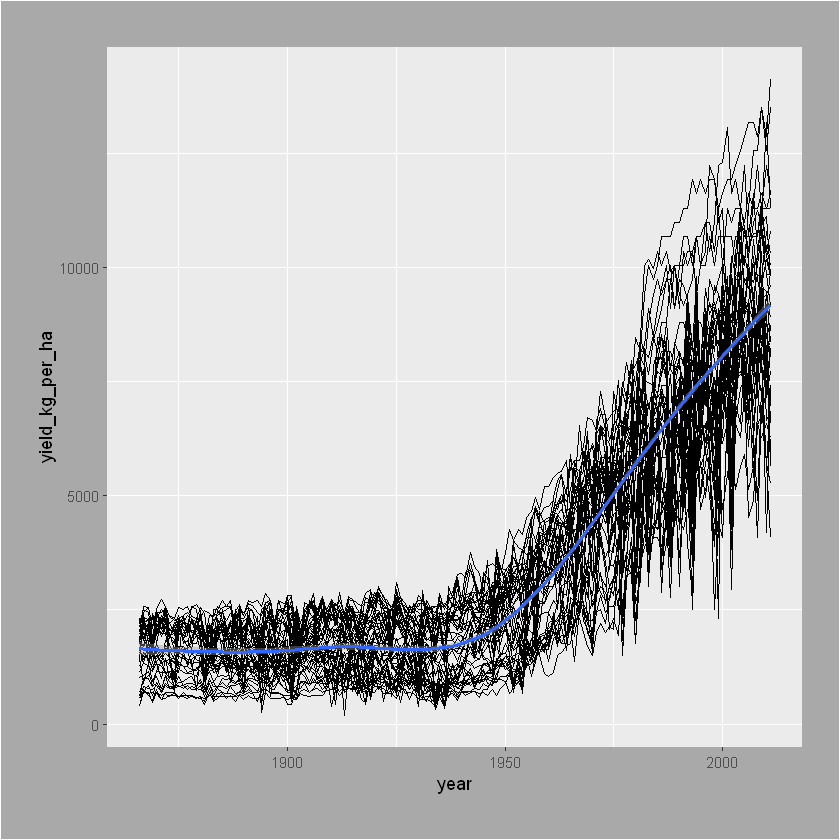

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


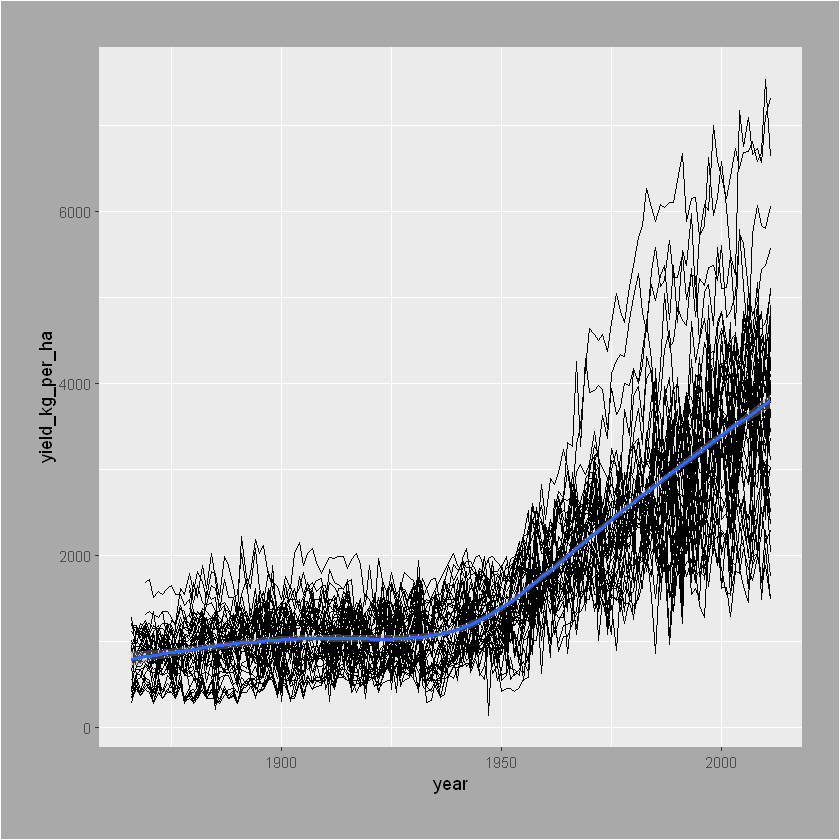

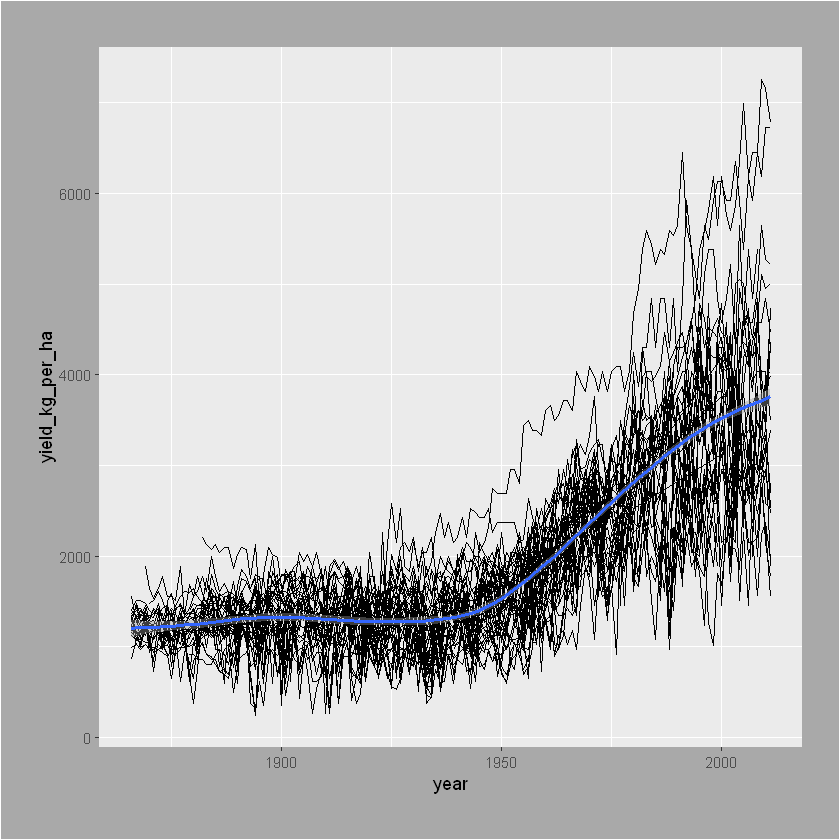

In [21]:
# Function for plotting
plot_yield_vs_year <- function(data) {
  ggplot(data, aes(year, yield_kg_per_ha)) +
    # Add a line layer, group by state
    geom_line(aes(group = state)) +
    # Add a smooth trend layer
    geom_smooth() +
    # Add theme
    theme(plot.margin = margin(1,.8,1,.8, "cm"),
        plot.background = element_rect(fill = "darkgrey"))
}

# Test it on the datasets
plot_yield_vs_year(corn)
plot_yield_vs_year(wheat)
plot_yield_vs_year(barley)

### Plotting yields over time by region
The USA has a varied climate, so we might expect yields to differ between states. Rather than trying to reason about 50 states separately, we can use the USA Census Regions to get 9 groups.

The "Corn Belt", where most US corn is grown is in the "West North Central" and "East North Central" regions. The "Wheat Belt" is in the "West South Central" region.

`dplyr` is loaded, the `corn` and `wheat` datasets are available, as is `usa_census_regions`.

In [22]:
usa_census_regions <- read_csv("https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv")
usa_census_regions <- usa_census_regions[ , -c(2)]
colnames(usa_census_regions) <- tolower(colnames(usa_census_regions))
head(usa_census_regions)

Parsed with column specification:
cols(
  State = col_character(),
  `State Code` = col_character(),
  Region = col_character(),
  Division = col_character()
)


state,region,division
Alaska,West,Pacific
Alabama,South,East South Central
Arkansas,South,West South Central
Arizona,West,Mountain
California,West,Pacific
Colorado,West,Mountain


In [32]:
# Wrap into function: inner join by state
fortify_with_census_region <- function(data){
  data %>%
    inner_join(usa_census_regions, by = "state")
}

# Fortify the dataset
corn <- fortify_with_census_region(corn)
wheat <- fortify_with_census_region(wheat)
barley <- fortify_with_census_region(barley)

# Preview the head
head(corn)
head(wheat)
head(barley)


year,state,farmed_area_acres,yield_bushels_per_acre,farmed_area_ha,yield_kg_per_ha,region.x,division.x,region.y,division.y,region,division
1866,Alabama,1050000,9,424919.92,564.909,South,East South Central,South,East South Central,South,East South Central
1866,Arkansas,280000,18,113311.98,1129.818,South,West South Central,South,West South Central,South,West South Central
1866,California,42000,28,16996.80,1757.495,West,Pacific,West,Pacific,West,Pacific
1866,Connecticut,57000,34,23067.08,2134.101,Northeast,New England,Northeast,New England,Northeast,New England
1866,Delaware,200000,23,80937.13,1443.656,South,South Atlantic,South,South Atlantic,South,South Atlantic
1866,Florida,125000,9,50585.71,564.909,South,South Atlantic,South,South Atlantic,South,South Atlantic


year,state,farmed_area_acres,yield_bushels_per_acre,farmed_area_ha,yield_kg_per_ha,region.x,division.x,region.y,division.y,region,division
1866,Alabama,125000,5.0,50585.7053,336.2553,South,East South Central,South,East South Central,South,East South Central
1866,Arkansas,50000,6.5,20234.2821,437.1320,South,West South Central,South,West South Central,South,West South Central
1866,California,650000,18.0,263045.6675,1210.5192,West,Pacific,West,Pacific,West,Pacific
1866,Connecticut,2000,17.5,809.3713,1176.8937,Northeast,New England,Northeast,New England,Northeast,New England
1866,Delaware,59000,11.0,23876.4529,739.7618,South,South Atlantic,South,South Atlantic,South,South Atlantic
1866,Georgia,245000,4.0,99147.9823,269.0043,South,South Atlantic,South,South Atlantic,South,South Atlantic


year,state,farmed_area_acres,yield_bushels_per_acre,farmed_area_ha,yield_kg_per_ha,region.x,division.x,region.y,division.y,region,division
1866,Connecticut,1000,22.5,404.6856,1210.519,Northeast,New England,Northeast,New England,Northeast,New England
1866,Illinois,96000,23.4,38849.8217,1258.940,Midwest,East North Central,Midwest,East North Central,Midwest,East North Central
1866,Indiana,11000,23.0,4451.5421,1237.420,Midwest,East North Central,Midwest,East North Central,Midwest,East North Central
1866,Iowa,66000,22.0,26709.2524,1183.619,Midwest,West North Central,Midwest,West North Central,Midwest,West North Central
1866,Kansas,2000,23.0,809.3713,1237.420,Midwest,West North Central,Midwest,West North Central,Midwest,West North Central
1866,Kentucky,10000,23.5,4046.8564,1264.320,South,East South Central,South,East South Central,South,East South Central


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


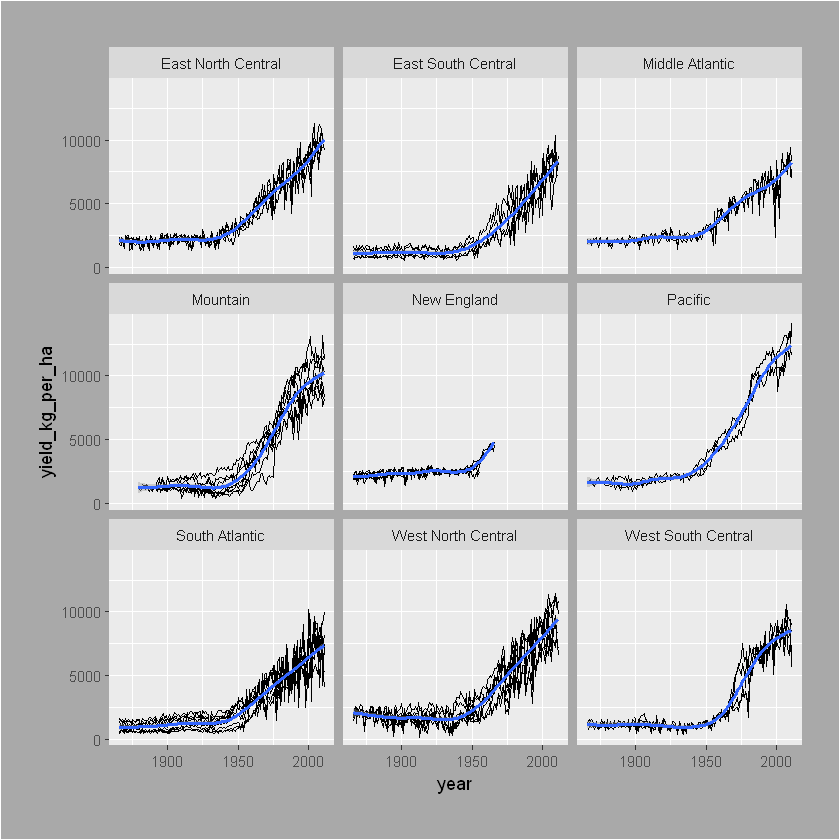

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


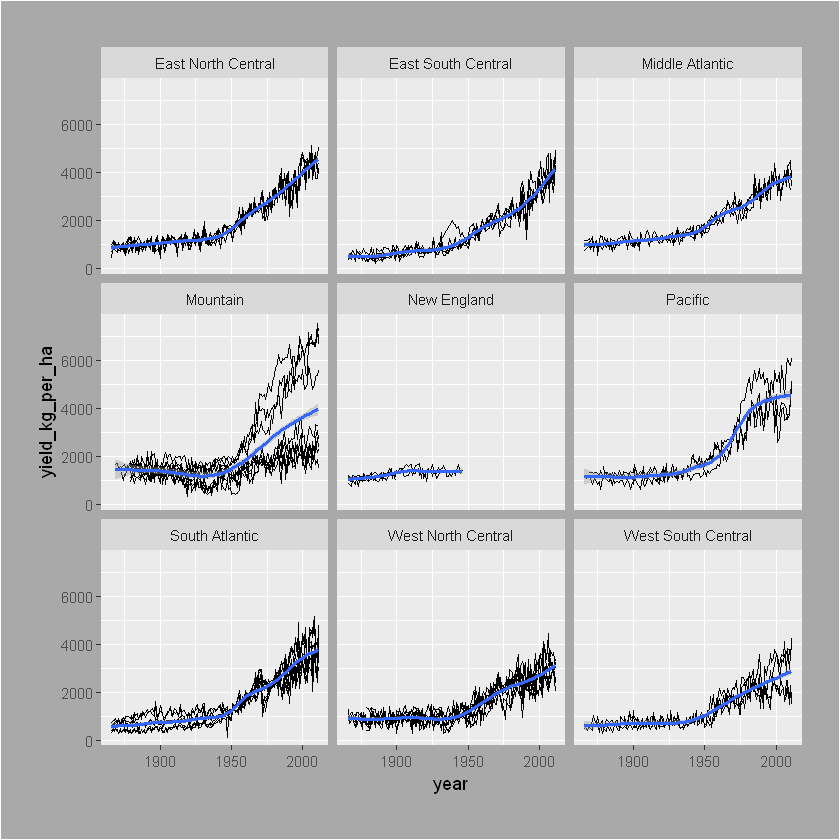

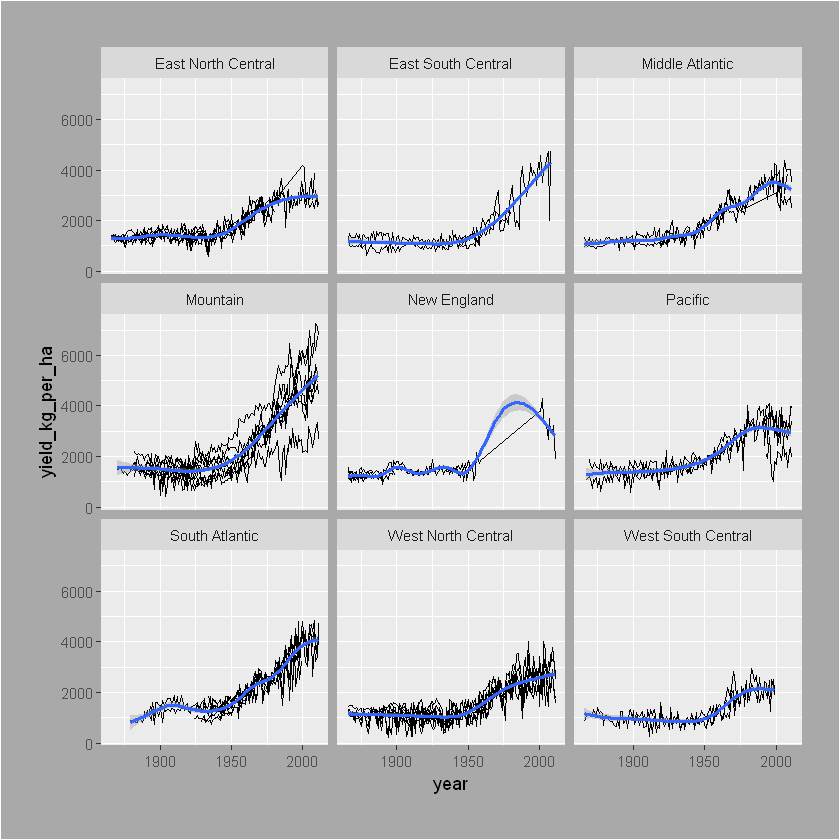

In [37]:
# Plot crop yields over time by region
plot_yield_vs_year_by_region <- function(data){
  plot_yield_vs_year(data) +
    facet_wrap(vars(division))
}
plot_yield_vs_year_by_region(corn)
plot_yield_vs_year_by_region(wheat)
plot_yield_vs_year_by_region(barley)


## 4. Model grain yields
### Create GAM models
The smooth trend line you saw in the plots of yield over time uses a **generalized additive model (GAM)** to determine where the line should lie. This sort of model is ideal for fitting nonlinear curves. So we can make predictions about future yields, let's explicitly run the model. The syntax for running this GAM takes the following form:
`gam(response ~ s(explanatory_var1) + explanatory_var2, data = dataset)`
Here, `s()` means "make the variable smooth", where smooth very roughly means nonlinear.

In [25]:
# Wrap the model code into a function
run_gam_yield_vs_year_by_region <- function(data){
  gam(yield_kg_per_ha ~ s(year) + division, data = data)
}

# Create model
wheat_model <- run_gam_yield_vs_year_by_region(wheat)
corn_model <- run_gam_yield_vs_year_by_region(corn)
barley_model <- run_gam_yield_vs_year_by_region(barley)

### Make predictions
The fun part of modeling is using the models to make predictions. You can do this using a call to `predict()`, in the following form.

`predict(model, cases_to_predict, type = "response")`

In [14]:
census_regions <- usa_census_regions %>%
  distinct(division)
# Wrap this prediction code into a function
predict_yields <- function(model, year){
  predict_this <- data.frame(
    year = year,
    census_region = census_regions
  ) 
  pred_yield_kg_per_ha <- predict(model, predict_this, type = "response")
  predict_this %>%
    mutate(pred_yield_kg_per_ha = pred_yield_kg_per_ha)
}

# Try it on the datasets
predict_yields(corn_model, 2050)
predict_yields(wheat_model, 2050)
predict_yields(barley_model, 2050)

year,division,pred_yield_kg_per_ha
2050,Pacific,14396.33
2050,East South Central,12481.83
2050,West South Central,12616.83
2050,Mountain,13360.67
2050,New England,13971.80
2050,South Atlantic,12517.50
2050,West North Central,13262.68
2050,East North Central,13858.74
2050,Middle Atlantic,13483.19


year,division,pred_yield_kg_per_ha
2050,Pacific,5707.724
2050,East South Central,4985.757
2050,West South Central,4764.289
2050,Mountain,5457.741
2050,New England,5506.308
2050,South Atlantic,5079.523
2050,West North Central,4984.050
2050,East North Central,5470.007
2050,Middle Atlantic,5425.554


year,division,pred_yield_kg_per_ha
2050,Pacific,4267.937
2050,East South Central,4015.834
2050,West South Central,3638.759
2050,Mountain,4638.785
2050,New England,4229.927
2050,South Atlantic,4248.425
2050,West North Central,3843.945
2050,East North Central,4210.503
2050,Middle Atlantic,4247.439
